Observation #1: It is not as obvious in the scatter plot but the bar chart reveals that news on average across all outlets is negative.

Observation #2: Too many points end up on the neutral line and with a more complex sentiment analyzer some more detail could be gained from these points.

Observation #3: My expectations were for both plots to be even more negatively skewed as that seems to be what sells.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os
import datetime as dt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [48]:
file_name = "../api_keys.json"
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [49]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [50]:
target_terms = ["@cnnbrk", "@CBSNews", "@BBCWorld", "@FoxNews", "@nytimes"]

In [51]:
#sentiment_df = ""

In [52]:
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
sentiments = []

In [53]:
for news_handle in target_terms:
    public_tweets = api.user_timeline(news_handle, count=100, result_type="recent")
    counter = 1

    for tweet in public_tweets:
        
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
    
        sentiments.append({"News Account": tweet["user"]["name"], "Date": tweet["created_at"], "Text": tweet['text'], "Compound": compound, "Positive": pos, "Negative": neu, "Neutral": neg, "Tweets Ago": tweets_ago})
        counter = counter + 1

In [57]:
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df.to_csv("News_Sentiments.csv", sep=',', encoding='utf-8')
sentiments_df

,Compound,Date,Negative,Neutral,News Account,Positive,Text,Tweets Ago
0,-0.4588,Sat Feb 03 13:44:24 +0000 2018,0.750,0.175,CNN Breaking News,0.075,Exclusive: CNN has caught North Korea violatin...,1
1,-0.7506,Sat Feb 03 13:42:31 +0000 2018,0.684,0.316,CNN Breaking News,0.000,Police in Italy arrested a man suspected of op...,2
2,-0.3818,Sat Feb 03 08:27:54 +0000 2018,0.885,0.115,CNN Breaking News,0.000,Lady Gaga has canceled the final 10 dates of h...,3
3,-0.4939,Sat Feb 03 07:32:04 +0000 2018,0.849,0.151,CNN Breaking News,0.000,North Korea earned nearly $200 million from ex...,4
4,0.2960,Sat Feb 03 07:22:32 +0000 2018,0.913,0.000,CNN Breaking News,0.087,The man who says he sent out the false ballist...,5
5,0.2960,Sat Feb 03 03:09:09 +0000 2018,0.763,0.093,CNN Breaking News,0.144,"A White House spokesman says there will be ""no...",6
6,0.4767,Sat Feb 03 01:15:05 +0000 2018,0.846,0.000,CNN Breaking News,0.154,Rep. Nunes says the House Intelligence Committ...,7
7,-0.7269,Sat Feb 03 00:22:30 +0000 2018,0.766,0.234,CNN Breaking News,0.000,A man who sold ammunition to the killer in las...,8
8,-0.0031,Fri Feb 02 23:07:05 +0000 2018,0.657,0.172,CNN Breaking News,0.171,Trump threatens to cut off aid to countries th...,9
9,0.0000,Fri Feb 02 21:54:22 +0000 2018,1.000,0.000,CNN Breaking News,0.000,"RT @CNNPolitics: The US says Russia is ""develo...",10


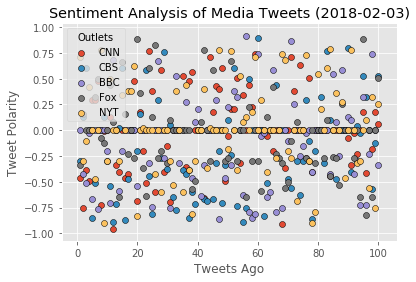

In [58]:
plt.style.use('ggplot')

date = dt.date.today()
cnn_df = sentiments_df[sentiments_df["News Account"]=="CNN Breaking News"]
cbs_df = sentiments_df[sentiments_df["News Account"]=="CBS News"]
bbc_df = sentiments_df[sentiments_df["News Account"]=="BBC News (World)"]
fox_df = sentiments_df[sentiments_df["News Account"]=="Fox News"]
nyt_df = sentiments_df[sentiments_df["News Account"]=="The New York Times"]
plt.scatter(cnn_df["Tweets Ago"], cnn_df["Compound"], label="CNN", edgecolor="black")
plt.scatter(cbs_df["Tweets Ago"], cbs_df["Compound"], label="CBS", edgecolor="black")
plt.scatter(bbc_df["Tweets Ago"], bbc_df["Compound"], label="BBC", edgecolor="black")
plt.scatter(fox_df["Tweets Ago"], fox_df["Compound"], label="Fox", edgecolor="black")
plt.scatter(nyt_df["Tweets Ago"], nyt_df["Compound"], label="NYT", edgecolor="black")
plt.legend(title="Outlets", loc="best")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (" + str(date) + ")")
plt.savefig("Sentiment_Scatter.png")

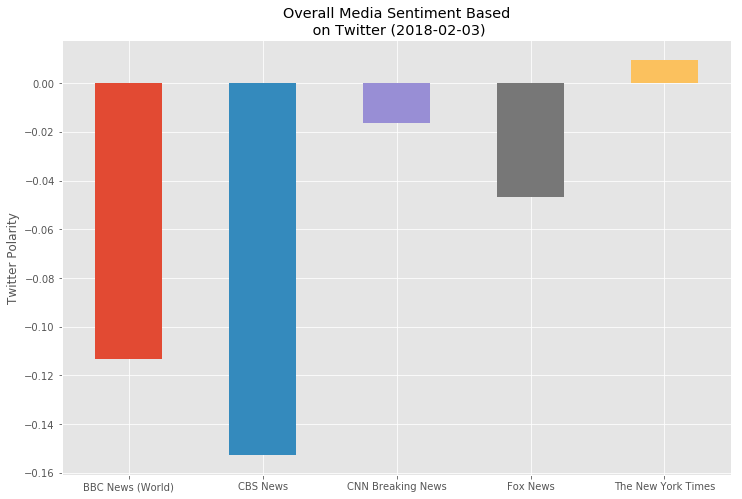

In [63]:
news = sentiments_df.groupby("News Account")["Compound"].mean()
plt.figure(figsize=(12,8))
news = news.plot(kind="bar", rot=0)
#news_bar = news.plot(kind="bar")
plt.ylabel("Twitter Polarity")
plt.xlabel("")
plt.title("Overall Media Sentiment Based\n on Twitter (" + str(date) + ")")
plt.savefig("Sentiment_Bar.png")



In [64]:
sentiments_df.groupby("News Account")["Compound"].mean()

News Account
BBC News (World)     -0.113237
CBS News             -0.152701
CNN Breaking News    -0.016371
Fox News             -0.046613
The New York Times    0.009700
Name: Compound, dtype: float64